<h2> Airbnb Listings Analysis and Insights <h2>

<h5>Created by: Tram Minh Dang<h5>
<a>"https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/">Reference</a>

## Data Cleaning and Preparation

#### A. Used Librabries

In [1]:
# Import necessary libraries
# General Data manipulation
import pandas as pd # Data processing, CSV file 
import numpy as np # Linear algebra
# General Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data
df = pd.read_csv('Airbnb_Open_Data.csv', low_memory=False)

#### B. First exploration
<h7>Let's know more about object, shape, head of Dataframe<h7>

In [3]:
print(df.shape)
print(df.info())
df.head()

(102599, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  can

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


### Data cleaning

#### A. Dealing with missing values

<h7><b>Let's look at the missing value of columns in the dataframe<b><h7>

In [3]:
#Make a copy of dataframe before jump in cleaning steps
data = df.copy()

In [4]:
#Missing values calculation

#The below code helps to calculate the percentage of missing values in each column
data.isnull().sum()/len(df)*100

id                                 0.000000
NAME                               0.243667
host id                            0.000000
host_identity_verified             0.281679
host name                          0.395715
neighbourhood group                0.028265
neighbourhood                      0.015595
lat                                0.007797
long                               0.007797
country                            0.518524
country code                       0.127682
instant_bookable                   0.102340
cancellation_policy                0.074075
room type                          0.000000
Construction year                  0.208579
price                              0.240743
service fee                        0.266084
minimum nights                     0.398639
number of reviews                  0.178364
last review                       15.490404
reviews per month                 15.476759
review rate number                 0.317742
calculated host listings count  

> The percentage of missing values for the columns 'license' is ~99.99% 

In [5]:
#Missing value total
data.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

<h5>Data Reduction<h5>

    
    Some columns or variables can be dropped if they do not add value to our analysis.
    In this dataset, 'host name', 'country','country code','house_rules','calculated host listings count','last review' are the columns I don't need for this analysis topic

In [5]:
# drop unecessary columns
# 'license' has 99,9% empty rows
data = data.drop(columns=['host name', 'country','country code','house_rules',
                              'calculated host listings count','last review','license']) 

In [6]:
# rename columns name for better understanding 
columns = {'id' : 'id',
           'NAME' : 'listing_name', 
           'host id':'host_id',
           'host_identity_verified':'host_verification',
           'neighbourhood group' :'neighbourhood_group', 
           'neighbourhood':'neighbourhood', 
           'lat':'latitude', 
           'long':'longitude',
           'instant_bookable':'instant_bookable',
           'cancellation_policy':'cancellation_policy',
           'room type':'room_type',
           'Construction year':'construction_year',
           'price':'price',
           'service fee':'service_fee', 
           'minimum nights':'min_nights',
           'number of reviews':'number_of_reviews',
           'reviews per month':'avg_reviews_per_month', 
           'review rate number':'star_rating',
           'availability 365':'yearly_availability'}

data.rename(columns,axis=1,inplace=True)

<h5>Handling null values<h5>

> To handle null values in a dataset, there are various methods depending on the nature of the data and the importance of each column. Here are the recommended solutions for each null column.

In [7]:
#Drop null columns that can't be fillment or replace.
data = data.dropna(subset = ['listing_name', 'neighbourhood_group', 'neighbourhood', 'instant_bookable', 'cancellation_policy', 
                                 'construction_year', 'yearly_availability','price'])

#Null values of "host_verification" can be replace by "Not Verified"
data.loc[:, 'host_verification'] = data['host_verification'].fillna("Not Verified")

#Replace null values with the median value.
data.loc[:, 'min_nights'] = data['min_nights'].fillna(data['min_nights'].median())

#Replace null values with "0"
data.loc[:,'number_of_reviews'] = data['number_of_reviews'].fillna(0)
data.loc[:,'star_rating'] = data['star_rating'].fillna(0.0)

#Remove remaining records with missing values in DataFrame.
data = data.dropna()


In [8]:
data.isnull().sum()

id                       0
listing_name             0
host_id                  0
host_verification        0
neighbourhood_group      0
neighbourhood            0
latitude                 0
longitude                0
instant_bookable         0
cancellation_policy      0
room_type                0
construction_year        0
price                    0
service_fee              0
min_nights               0
number_of_reviews        0
avg_reviews_per_month    0
star_rating              0
yearly_availability      0
dtype: int64

#### B. Format Corrections

<h7><b>Format Errors<b><h7>
> In ‘price’ and ‘service fee’ columns, remove the leading “$” and thousands separator “,”, then convert them to int type.

> Correcting Misspelling. Replacing "brookln" with "Brooklyn" in the neighbourhood_group Column

In [9]:
data['price'] = data['price'].str.replace('$','')
data['price'] = data['price'].str.replace(',','')
data['service_fee'] = data['service_fee'].str.replace('$','')
data['service_fee'] = data['service_fee'].str.replace(',','')
data['neighbourhood_group'] = data['neighbourhood_group'].str.replace('brookln','Brooklyn')

<h7><b>Domain Violations<b><h7>

In [10]:
print('Negative values: ',data['min_nights'].min())
#domain vilations:
data['min_nights'] = data['min_nights'].abs()

Negative values:  -365.0


In [11]:
data.columns

Index(['id', 'listing_name', 'host_id', 'host_verification',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'min_nights',
       'number_of_reviews', 'avg_reviews_per_month', 'star_rating',
       'yearly_availability'],
      dtype='object')

#### C. Data Type Conversions

<h7><b>Change data types of columnss<b><h7>

In [12]:
data[['construction_year', 'min_nights','price','yearly_availability', 'service_fee']] = data[['construction_year', 'min_nights','price','yearly_availability', 'service_fee']].astype(int)
data['instant_bookable'] = data['instant_bookable'].map({'TRUE':True, 'FALSE': False}).astype(bool)
data['host_verification'] = data['host_verification'].map({'Verified':True, 'Unconfirmed': False}).astype(bool)

#### D. Dealing with inconsistence data values.

In [13]:
# Remove rows where 'min_nights' <= 0
data = data[data['min_nights'] > 0]
# Remove rows where 'service_fee' <= 0
data = data[data['service_fee'] > 0]
# Remove rows where 'price' <= 0
data = data[data['price'] > 0]
# Remove rows where 'number_of_reviews' <= 0
data = data[data['number_of_reviews'] > 0]
# Remove rows where 'min_nights' is <= 0 or > 366
data = data[(data['min_nights'] > 0) & (data['min_nights'] <= 366)]
# Remove rows where 'star_rating' is < 0 or > 5
data = data[(data['star_rating'] >= 0) & (data['star_rating'] <= 5)]
# Remove rows where 'yearly_availability' is < 0 or > 366
data = data[(data['yearly_availability'] >= 0) & (data['yearly_availability'] <= 366)]
# Remove rows where 'avg_reviews_per_month' is < 0 or > 31
data = data[(data['avg_reviews_per_month'] >= 0) & (data['avg_reviews_per_month'] <= 31)]

#### E. Detecting Outliers

In [14]:
#detacting outliers - numerical attribute
for columns in data[['service_fee','price','min_nights','number_of_reviews','avg_reviews_per_month']]:
    q1 = data[columns].quantile(0.25)
    q3 = data[columns].quantile(0.75)
    iqr=q3-q1

    lower_whisker = q1-1.5*iqr
    upper_whisker = q3+1.5*iqr
    outliers = data[(data[columns]<lower_whisker) | (data[columns]>upper_whisker)]
    print(columns)
    print(outliers.shape[0])

service_fee
0
price
0
min_nights
13567
number_of_reviews
8225
avg_reviews_per_month
3794


## 4. EDA

In [19]:
data.head()

,id,listing_name,host_id,host_verification,neighbourhood_group,neighbourhood,latitude,longitude,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,min_nights,number_of_reviews,avg_reviews_per_month,star_rating,yearly_availability
0,1001254,Clean & quiet apt home by the park,80014485718,True,Brooklyn,Kensington,40.64749,-73.97237,True,strict,Private room,2020,966,193,10,9.0,0.21,4.0,286
1,1002102,Skylit Midtown Castle,52335172823,True,Manhattan,Midtown,40.75362,-73.98377,True,moderate,Entire home/apt,2007,142,28,30,45.0,0.38,4.0,228
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,True,Manhattan,East Harlem,40.79851,-73.94399,True,moderate,Entire home/apt,2009,204,41,10,9.0,0.10,3.0,289
6,1004650,BlissArtsSpace!,61300605564,True,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,True,moderate,Private room,2015,71,14,45,49.0,0.40,5.0,224
7,1005202,BlissArtsSpace!,90821839709,True,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,True,moderate,Private room,2009,1060,212,45,49.0,0.40,5.0,219


#### Categorizing Variables

In [14]:
# Numerical variables
num_cols = data.select_dtypes(include=np.number).columns
num_cols = data[num_cols]
num_cols.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'construction_year', 'price',
       'service_fee', 'min_nights', 'number_of_reviews',
       'avg_reviews_per_month', 'star_rating', 'yearly_availability'],
      dtype='object')

In [15]:
# Categorical variables
cat_cols = data.select_dtypes(include=['object']).columns
cat_cols = data[cat_cols]
cat_cols.columns

Index(['listing_name', 'neighbourhood_group', 'neighbourhood',
       'cancellation_policy', 'room_type'],
      dtype='object')

#### Summary Statistics

In [16]:
#Generate summary statistics for numerical columns to understand central tendencies, dispersions, and distributions.
num_cols[['price','service_fee','number_of_reviews']].describe()

,price,service_fee,number_of_reviews
count,83030.000000,83030.000000,83030.000000
mean,626.460388,125.292822,31.875671
std,331.660966,66.335548,51.023052
min,50.000000,10.000000,1.000000
25%,341.000000,68.000000,3.000000
50%,626.000000,125.000000,11.000000
75%,914.000000,183.000000,38.000000
max,1200.000000,240.000000,884.000000


<blockquote> There are continous quantitative data, a price mean of 626.17 and a relatively large standard deviation of 331.7. Visualize by histogram and boxplot chart will good to understand the distribution of data </blockquote>

<b>Univariate Analysis<b>

> Analyzing/visualizing the dataset by taking one variable at a time

> Due to univariate analysis can be done for both Categorical and Numerical variables. Therefore, let's get start with categorical variable first.

In [17]:
#categorical variable

#neighborhood group analysis 
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [20]:
#Qualitative Variables Frequency Distribution Tables

#count the occurrences of listings in each neighbourhood group
neighbourhood_group_counts = data['neighbourhood_group'].value_counts().reset_index()

#for better understanding, I'll create new dataframe and visualize it.
neighbourhood_group_counts.columns= ['neighbourhood_group','count']
neighbourhood_group_counts

#calculate the percentage distribution of price per location
x = (neighbourhood_group_counts['count'] / neighbourhood_group_counts['count'].sum())*100
dis_location = pd.DataFrame({'Location':neighbourhood_group_counts['neighbourhood_group'],'Numbers of listings':neighbourhood_group_counts['count'],'Percentage':x.values}) 
dis_location

,Location,Numbers of listings,Percentage
0,Brooklyn,34416,41.450078
1,Manhattan,34307,41.318800
2,Queens,11173,13.456582
3,Bronx,2308,2.779718
4,Staten Island,826,0.994821


> I'm using statistical techniques such as frequency distribution tables, histograms and bar graphs we can better understand how the phenomena under study are distributed.

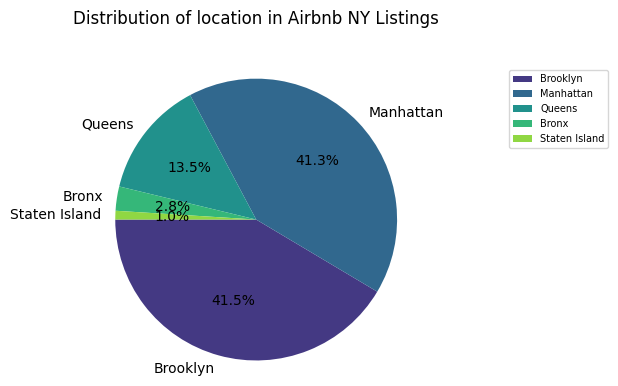

In [55]:
plt.figure(figsize=(4, 4))
plt.pie(dis_location.Percentage,labels=dis_location.Location,labeldistance=1.1,startangle=180,autopct='%1.1f%%',colors=sns.color_palette('viridis', len(dis_location)))
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(1.3, 1), prop={'size': 7})
plt.title('Distribution of location in Airbnb NY Listings',pad=30);

unique value:  223
         Neigbourhood  Numbers of listings  Percentage
0  Bedford-Stuyvesant                 6722   17.513418
1        Williamsburg                 6288   16.382679
2              Harlem                 4514   11.760721
3            Bushwick                 3973   10.351206
4      Hell's Kitchen                 3168    8.253869
5     Upper West Side                 2959    7.709343
6     Upper East Side                 2898    7.550414
7        East Village                 2772    7.222135
8       Crown Heights                 2661    6.932937
9             Midtown                 2427    6.323277


<Figure size 600x400 with 0 Axes>

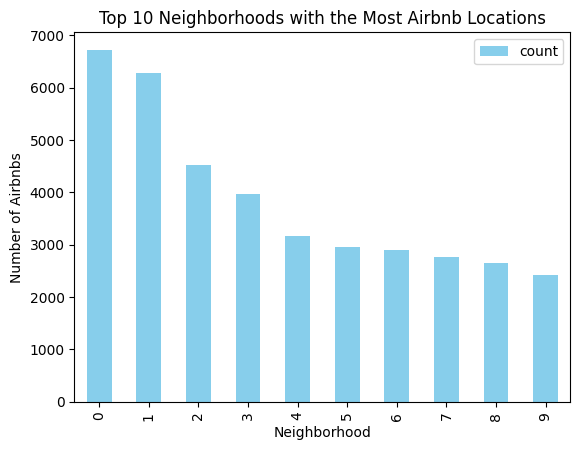

In [45]:
#neighborhoods/area unique values
print('unique value: ',data['neighbourhood'].nunique())

#finding top 10 area in listings
top_area = data["neighbourhood"].value_counts().head(10).reset_index()
#percentage table
x = (top_area['count'] / top_area['count'].sum())*100
dis_area = pd.DataFrame({'Neigbourhood':top_area['neighbourhood'],'Numbers of listings':top_area['count'],'Percentage':x.values}) 
print(dis_area)
#plotting to bar chart 
plt.figure(figsize=(6, 4))
top_area.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods with the Most Airbnb Locations')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Airbnbs')
plt.show();

In [46]:
#calculate the distribution of room types
room_type_count = data['room_type'].value_counts().reset_index()
room_type_count.columns=['room_type','counts']
#calculate the percentage distribution
x = (room_type_count['counts'] / room_type_count['counts'].sum())*100
room_type_percentage = pd.DataFrame({'Room Type':room_type_count.room_type,'Percentage':x.values}) 
room_type_percentage

,Room Type,Percentage
0,Entire home/apt,52.779718
1,Private room,45.076478
2,Shared room,2.007708
3,Hotel room,0.136095


> With the frequency tables and diagram created above, we can conclude that the frequency and the representative percentage of the three most frequent categories of the categorical variables neighborhood_group, neighborhood and room_type are:

<i> Neighbourhood_group</i>
<ul>
<li>Brooklyn (41.45%)</li>
<li>Manhattan (41.32%)</li>
<li>Queens (13.45%)</li>
</ul>
<i> Neighbourhood/Area</i>
<ul>
<li> Bedford-Stuyvesant (~17.52%)</li>
<li> Williamsburg (16.38%)</li>
<li> Harlem (11.76%)</li>
</ul>
<i>Room Type</i>
<ul>
<li>Entire home/apt	(~52.78%)</li>
<li>Private room (~45.08%)</li>
<li>Shared room	(~2.01%)</li>
</ul>

In [47]:
# Frequency Distribution Tables for quantitative variables

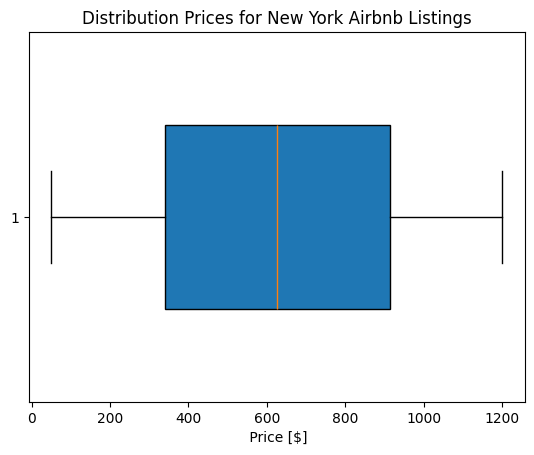

In [18]:
plt.boxplot(data['price'],vert=False, widths=0.5,patch_artist=True)
plt.xlabel(" Price [$]")
plt.title("Distribution Prices for New York Airbnb Listings")
plt.show()

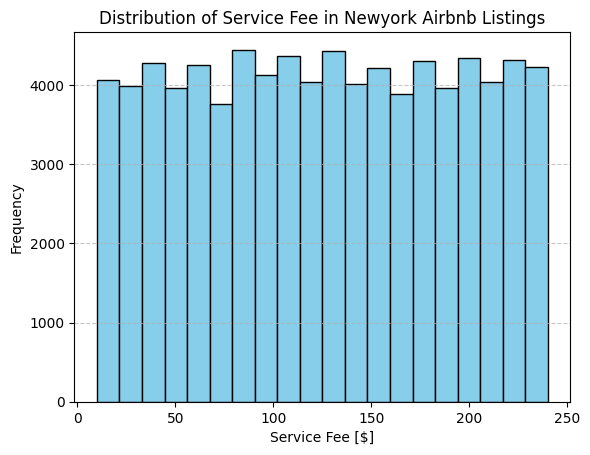

In [17]:
plt.hist(data['service_fee'], bins=20, edgecolor='black',color='skyblue')
plt.title('Distribution of Service Fee in Newyork Airbnb Listings')
plt.xlabel('Service Fee [$]')
plt.ylabel('Frequency')
plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.show()

<h5> EDA Bivariate Analysis <h5>
    
<i> Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset. </i>

<h5> Price in Relation to Neighborhood<h5>

In [59]:
# The average price per neighbourhood group 
avg_price = data.groupby('neighbourhood_group')['price'].mean().reset_index()
avg_price.columns = ['neighbourhood_group','mean']
print(avg_price)

  neighbourhood_group        mean
0               Bronx  628.424610
1            Brooklyn  627.374157
2           Manhattan  624.143382
3              Queens  630.465766
4       Staten Island  624.953995


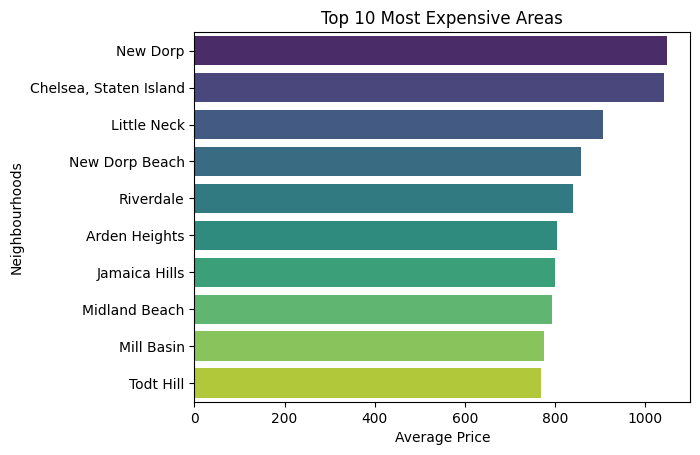

In [97]:
# The average price per neighbourhood/area
avg_price_per_area = data.groupby('neighbourhood')['price'].mean().sort_values().reset_index()
#top 10 most expensive neighbourhoods
top_10_exp = avg_price_per_area.sort_values(by='price', ascending=False).head(10)
#bar chart for more insight
sns.barplot(y=top_10_exp['neighbourhood'], x=top_10_exp['price'], palette='viridis',hue=top_10_exp['neighbourhood'], dodge=False)
plt.title('Top 10 Most Expensive Areas')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhoods')
plt.legend([],[], frameon=False)
plt.show()

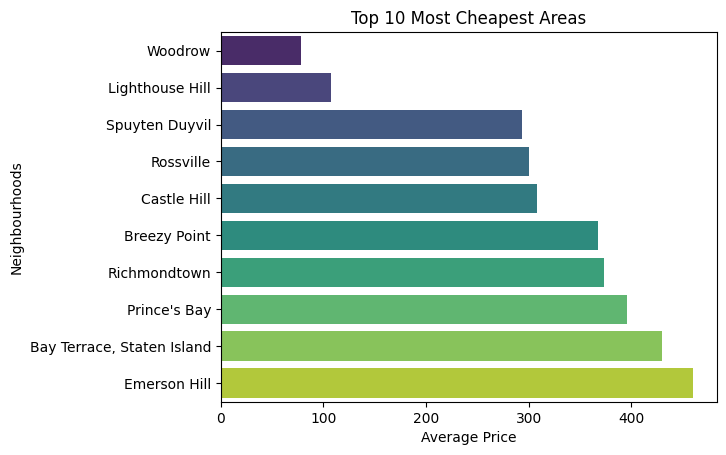

In [116]:
#how about the top 10 cheapest area in Airbnb listings?
top_10_cheapest = avg_price_per_area.sort_values(by='price', ascending=True).head(10)
#plotting to bar chart
sns.barplot(y=top_10_cheapest['neighbourhood'], x=top_10_cheapest['price'], palette='viridis',hue=top_10_cheapest['neighbourhood'], dodge=False)
plt.title('Top 10 Most Cheapest Areas')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhoods')
plt.legend([],[], frameon=False)
plt.show()

<h5>Average price per room type<h5>

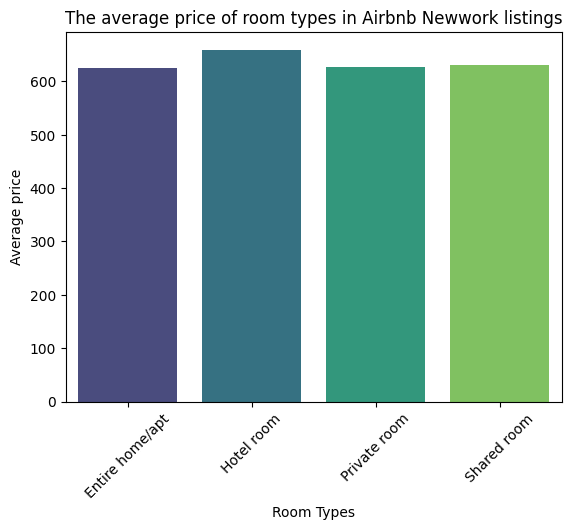

In [117]:
#calculate average price by room type
avg_price_per_roomtype=data.groupby('room_type')['price'].mean().reset_index()
avg_price_per_roomtype.columns=['room_type','avg_price']
avg_price_per_roomtype.head()

#bar chart
plt.figure(figsize=(6.4, 4.8))
sns.barplot(data=avg_price_per_roomtype, x='room_type', y='avg_price', palette='viridis', hue='room_type', dodge=False)
plt.title('The average price of room types in Airbnb Newwork listings')
plt.xlabel('Room Types')
plt.ylabel('Average price')
plt.legend([],[], frameon=False)
plt.xticks(rotation=45)
plt.show()

<h5>Price and the review rate<h5>

In [123]:
data.columns

Index(['id', 'listing_name', 'host_id', 'host_verification',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'min_nights',
       'number_of_reviews', 'avg_reviews_per_month', 'star_rating',
       'yearly_availability'],
      dtype='object')

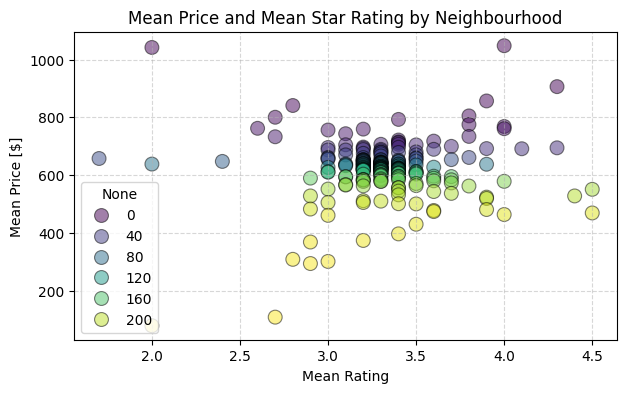

In [147]:
mean_price_neighbourhood_review = data.groupby('neighbourhood').agg({'price': 'mean','star_rating':'mean'}).sort_values(by='price',ascending=False).round(1).reset_index()
mean_price_neighbourhood_review.head(10)

#To know about correlation between the price and the review rate of Airbnb listings in New York, let's plotting to scatter plot 
plt.figure(figsize=(7, 4))
# Scatter plot
sns.scatterplot(data=mean_price_neighbourhood_review, x='star_rating', y='price', hue=mean_price_neighbourhood_review.index, palette='viridis', s=100, edgecolor='k', alpha=0.5)
# Set labels and title
plt.xlabel('Mean Rating')
plt.ylabel('Mean Price [$]')
plt.title('Mean Price and Mean Star Rating by Neighbourhood')
# Show plot
plt.grid(True,linestyle='--', alpha=0.5)
plt.show()
